In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore");
df = pd.read_csv("sonar_dataset.csv",header=None)
df.shape

(208, 61)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [22]:
df[5].max(),df[5].min()

(0.3823, 0.0102)

In [25]:
#null or not
sum(df.isna().sum())

0

In [26]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [29]:
df[60].unique(),df[60].value_counts()

(array(['R', 'M'], dtype=object),
 M    111
 R     97
 Name: 60, dtype: int64)

In [31]:
x = df.drop(60,axis='columns')
y = df[60]

In [35]:
y= pd.get_dummies(y,drop_first=True)
y.value_counts()

R
0    111
1     97
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
x_train.shape,x_test.shape

((156, 60), (52, 60))

In [44]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.Input(shape=(60,)),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

In [45]:
model.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7048 - accuracy: 0.5321
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6987
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7051
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6731
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7051
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7308
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7564
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7949
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7821
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8269
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 84/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 93/100


In [46]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.7500


[0.8589091897010803, 0.75]

In [47]:
y_pred = model.predict(x_test).reshape(-1)
print(y_pred[:10])
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 2ms/step
[1.16594414e-07 9.11941051e-01 9.99200523e-01 3.49421898e-05
 1.00000000e+00 9.99996603e-01 4.50574085e-02 1.00000000e+00
 4.87947400e-05 1.00000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


Text(0.5, 1.0, 'CM 1')

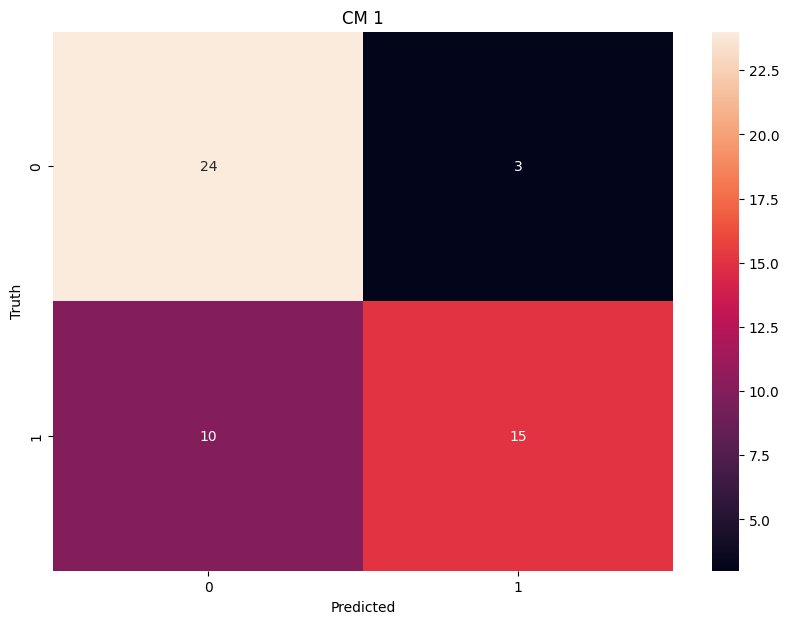

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("CM 1")

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.83      0.60      0.70        25

    accuracy                           0.75        52
   macro avg       0.77      0.74      0.74        52
weighted avg       0.77      0.75      0.74        52



DROPOUT LAYER

In [82]:
model2 = keras.Sequential([
    keras.Input(shape=(60,)),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

In [83]:
model2.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7070 - accuracy: 0.5385
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.4487
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5256
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.5385
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.4872
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5321
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5321
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5962
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5321
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8846
Epoch 84/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8205
Epoch 85/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8718
Epoch 86/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8846
Epoch 87/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8846
Epoch 88/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8590
Epoch 89/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8782
Epoch 90/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8397
Epoch 91/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8526
Epoch 92/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8718
Epoch 93/100


In [84]:
model2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8077


[0.42348751425743103, 0.807692289352417]

In [90]:
y_pred2 = model2.predict(x_test).reshape(-1)
print(y_pred2[:10])
y_pred2 = np.round(y_pred2)
print(y_pred2[:10])

2/2 [==============================] - 0s 2ms/step
[8.2280952e-05 5.9911579e-01 9.5615160e-01 1.6062211e-02 9.9816012e-01
 9.6599180e-01 2.9582018e-01 9.9445981e-01 1.9592229e-02 9.9924976e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


Text(0.5, 1.0, 'CM 1')

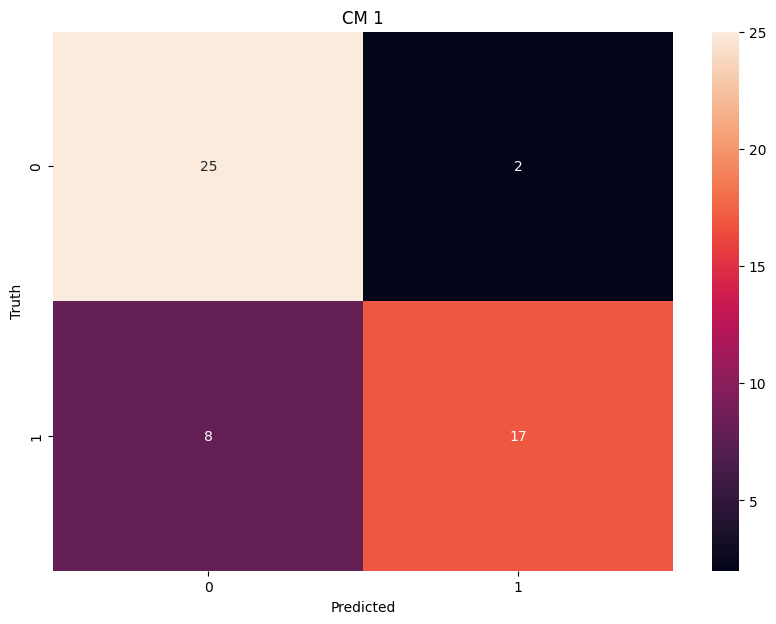

In [91]:
cm2 = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("CM 1")

In [92]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.89      0.68      0.77        25

    accuracy                           0.81        52
   macro avg       0.83      0.80      0.80        52
weighted avg       0.82      0.81      0.80        52

